In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('train.csv')
df.head(5)



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
print("info")
df.info()

info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
print('describe')
df.describe()

describe


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.isnull().sum()   #chking for null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# now because the cabin col contains too much null values so we drop that
df = df.drop(['Cabin'] ,axis=1)

In [9]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S


In [10]:
#now we fill the rows of age col using median instead of mean beacuse meand can lead us to outliers 
print("Age nulls initially:", df['Age'].isnull().sum())  # Should be ~177

# Check median
print("Age median:", df['Age'].median())  # Should NOT be NaN

# Fill missing age
df['Age'] = df['Age'].fillna(df['Age'].median())

# Check again
print("Age nulls after filling:", df['Age'].isnull().sum())  # Should now be 0

Age nulls initially: 177
Age median: 28.0
Age nulls after filling: 0


In [11]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [12]:
# now we see the embarked col
# Check unique values and counts
print(df['Embarked'].value_counts())


Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


In [13]:
# Find the most frequent value (mode)
embarked_mode = df['Embarked'].mode()[0]
df['Embarked'] = df['Embarked'].fillna(embarked_mode)
df['Embarked'].isnull().sum()

np.int64(0)

In [14]:
# Encoding
# Since we dont have too much categorical col so we can do One hot label encoding here
df = pd.get_dummies(df , columns=['Sex' , 'Embarked'] , drop_first=True)
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,True,False,True


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Sex_male     891 non-null    bool   
 10  Embarked_Q   891 non-null    bool   
 11  Embarked_S   891 non-null    bool   
dtypes: bool(3), float64(2), int64(5), object(2)
memory usage: 65.4+ KB


In [16]:
#we convert into int because we want 1 and 0 beacuse it is helpful in future
df['Embarked_Q'] = df['Embarked_Q'].astype('int')
df['Embarked_S'] = df['Embarked_S'].astype('int')
df['Sex_male'] = df['Sex_male'].astype('int') 

In [17]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,1


In [18]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,0,1
5,6,0,3,"Moran, Mr. James",28.0,0,0,330877,8.4583,1,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",54.0,0,0,17463,51.8625,1,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",2.0,3,1,349909,21.0750,1,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0,0,2,347742,11.1333,0,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",14.0,1,0,237736,30.0708,0,0,0


In [19]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208,0.647587,0.086420,0.725028
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429,0.477990,0.281141,0.446751
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000,0.000000,1.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,0.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000


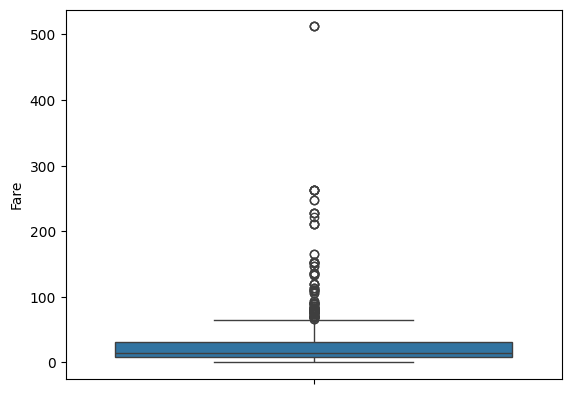

In [20]:
# Check for outliers
import seaborn as sns 
import matplotlib.pyplot as plt
sns.boxplot(df['Fare'])
plt.show()
#oultliers detected here

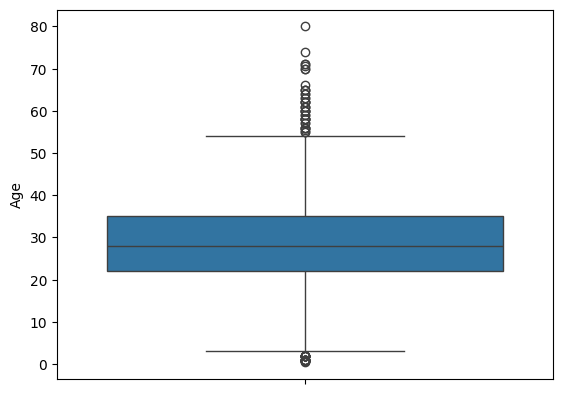

In [21]:
sns.boxplot(df['Age'])
plt.show()
# Outliers detected here

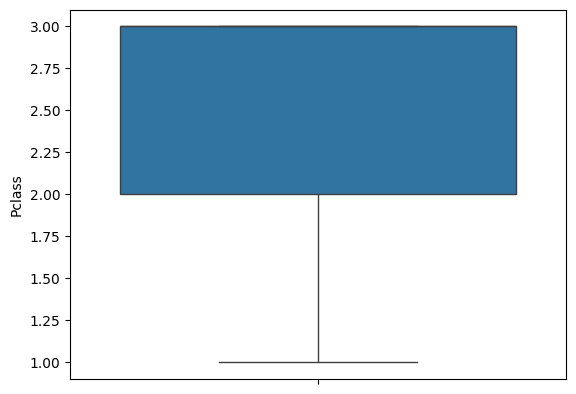

In [22]:
sns.boxplot(df['Pclass'])
plt.show()
#there are no outliers present in this 

In [23]:
#Using Iqr
Q1_age = df['Age'].quantile(0.25)
Q3_age = df['Age'].quantile(0.75)
IQR_age = Q3_age - Q1_age

lower_age = Q1_age - 1.5 * IQR_age
upper_age = Q3_age + 1.5 * IQR_age
print(lower_age)
print(upper_age)
outliers = df[(df['Age'] < lower_age) | (df['Age'] > upper_age)]
print(outliers)

# These rows contain the outliers




2.5
54.5
     PassengerId  Survived  Pclass  \
7              8         0       3   
11            12         1       1   
15            16         1       2   
16            17         0       3   
33            34         0       2   
..           ...       ...     ...   
827          828         1       2   
829          830         1       1   
831          832         1       2   
851          852         0       3   
879          880         1       1   

                                              Name    Age  SibSp  Parch  \
7                   Palsson, Master. Gosta Leonard   2.00      3      1   
11                        Bonnell, Miss. Elizabeth  58.00      0      0   
15                Hewlett, Mrs. (Mary D Kingcome)   55.00      0      0   
16                            Rice, Master. Eugene   2.00      4      1   
33                           Wheadon, Mr. Edward H  66.00      0      0   
..                                             ...    ...    ...    ...   
827      

In [24]:
#remove outliers from age
df_no_outlier = df[(df['Age'] > lower_age) & (df['Age'] < upper_age)]
df_no_outlier

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",28.0,1,2,W./C. 6607,23.4500,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,1,0,0


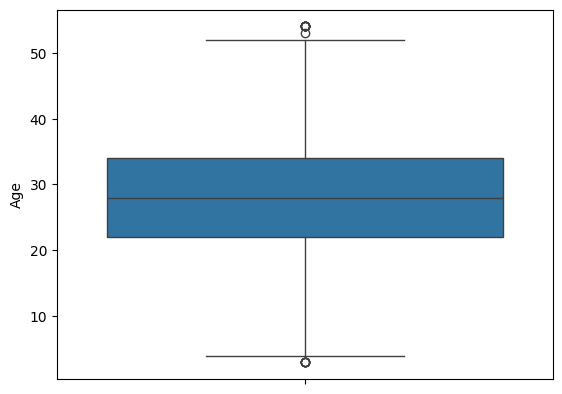

In [25]:
sns.boxplot(df_no_outlier['Age'])
plt.show()
#there are no outliers present in this 

In [26]:
#Using Iqr
Q1_fare = df['Fare'].quantile(0.25)
Q3_fare = df['Fare'].quantile(0.75)
IQR_fare= Q3_fare - Q1_fare

lower_fare = Q1_fare - 1.5 * IQR_fare
upper_fare = Q3_fare + 1.5 * IQR_fare
print(lower_fare)
print(upper_fare)
outliers = df[(df['Fare'] < lower_fare) | (df['Fare'] > upper_fare)]
print(outliers)

# These rows contain the outliers




-26.724
65.6344
     PassengerId  Survived  Pclass  \
1              2         1       1   
27            28         0       1   
31            32         1       1   
34            35         0       1   
52            53         1       1   
..           ...       ...     ...   
846          847         0       3   
849          850         1       1   
856          857         1       1   
863          864         0       3   
879          880         1       1   

                                                  Name   Age  SibSp  Parch  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
27                      Fortune, Mr. Charles Alexander  19.0      3      2   
31      Spencer, Mrs. William Augustus (Marie Eugenie)  28.0      1      0   
34                             Meyer, Mr. Edgar Joseph  28.0      1      0   
52            Harper, Mrs. Henry Sleeper (Myna Haxtun)  49.0      1      0   
..                                                 ...   ..

In [27]:
#remove outliers from age
df_no_outlier = df[(df['Fare'] > lower_fare) & (df['Fare'] < upper_fare)]
df_no_outlier

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1,0,1
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,0,1
5,6,0,3,"Moran, Mr. James",28.0,0,0,330877,8.4583,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",28.0,1,2,W./C. 6607,23.4500,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,1,0,0


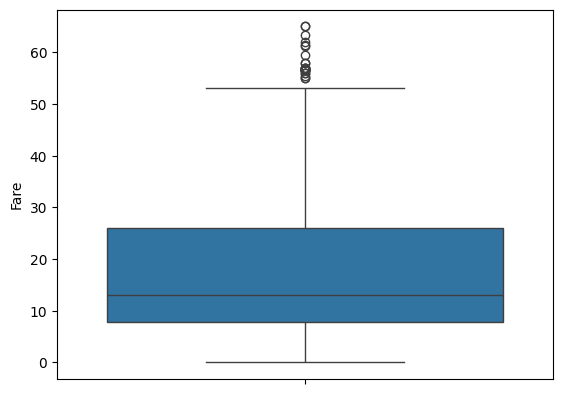

In [28]:
sns.boxplot(df_no_outlier['Fare'])
plt.show()
#there are no outliers present in this 

In [29]:
df_no_outlier.head(1)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.25,1,0,1


In [30]:
# remove unnecessary col
df_cleaned = df_no_outlier.drop(['PassengerId', 'Name', 'Ticket'], axis=1)


In [31]:
df_cleaned.head(2)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.250,1,0,1
2,1,3,26.0,0,0,7.925,0,0,1


In [43]:
# Feature Eng
# Feature: Family Size
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Feature: IsAlone
df['IsAlone'] = 0
df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1


In [32]:
from sklearn.model_selection import train_test_split

In [33]:
# train the model 
x = df_cleaned.drop('Survived' , axis=1)
y = df_cleaned['Survived']

X_train , X_test , Y_train , Y_test = train_test_split(x , y ,test_size=0.2 , random_state=42)

In [ ]:
# Using simple log reg 

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
model = LogisticRegression()
model.fit(X_train, Y_train)

# Predict on test set
y_pred = model.predict(X_test)

#Prediction on train data
x_pred = model.predict(X_train)

# Evaluate metrics
print("Accuracy on test data:", accuracy_score(Y_test, y_pred))
print("Accuracy on train data:", accuracy_score(Y_train, x_pred))
print("Precision:", precision_score(Y_test, y_pred))
print("Recall:", recall_score(Y_test, y_pred))
print("F1 Score:", f1_score(Y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred))

Accuracy on test data: 0.7612903225806451
Accuracy on train data: 0.8112903225806452
Precision: 0.7346938775510204
Recall: 0.6
F1 Score: 0.6605504587155964
Confusion Matrix:
 [[82 13]
 [24 36]]


c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Using grid search cv on log

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

logreg = LogisticRegression(max_iter=1000)

grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, Y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

best_logreg = grid_search.best_estimator_
y_test_pred = best_logreg.predict(X_test)
print("Test accuracy of best logistic regression model:", accuracy_score(Y_test, y_test_pred))


Best parameters: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Best cross-validation accuracy: 0.8032258064516128
Test accuracy of best logistic regression model: 0.7483870967741936


In [ ]:
# using gridsearchcv on RF

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'n_estimators': [50, 100, 200],
    'min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid.fit(x, y)

print("Best Parameters:", grid.best_params_)
print("Best Cross-Validated Score:", grid.best_score_)


Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-Validated Score: 0.8296774193548387


In [ ]:
best_model = grid.best_estimator_
y_test_pred = best_model.predict(X_test)
y_train_pred = best_model.predict(X_train)

from sklearn.metrics import accuracy_score
print("Test Accuracy with best RF model:", accuracy_score(Y_test, y_test_pred))
print("Train Accuracy with best RF model:", accuracy_score(Y_train, y_train_pred))


# Precision
print("Test Precision:", precision_score(Y_test, y_test_pred))
print("Train Precision:", precision_score(Y_train, y_train_pred))

# Recall
print("Test Recall:", recall_score(Y_test, y_test_pred))
print("Train Recall:", recall_score(Y_train, y_train_pred))

# F1 Score
print("Test F1 Score:", f1_score(Y_test, y_test_pred))
print("Train F1 Score:", f1_score(Y_train, y_train_pred))

# Confusion Matrix (for test)
print("Confusion Matrix (Test):\n", confusion_matrix(Y_test, y_test_pred))


# result of confusion matrix

# 91 True Negatives (correctly predicted non-survivors)

# 4 False Positives (predicted survived but actually didn’t)

# 9 False Negatives (predicted did not survive but actually did)

# 51 True Positives (correctly predicted survivors)

Test Accuracy with best RF model: 0.9161290322580645
Train Accuracy with best RF model: 0.9354838709677419
Test Precision: 0.9272727272727272
Train Precision: 0.9657142857142857
Test Recall: 0.85
Train Recall: 0.8325123152709359
Test F1 Score: 0.8869565217391304
Train F1 Score: 0.8941798941798942
Confusion Matrix (Test):
 [[91  4]
 [ 9 51]]
